# Coding Etiquette And Excel Reporting

## Contents

### 1. Import libraries and data exported from 4.9.
### 2. Address security implications.
### 3.Comparing customer behavior in different geographic areas. 
### Analyze spending Habit.
### 4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.
### 5. Customer profiling.
### 6.Create an appropriate visualization to show the distribution of profiles.
### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
### 8. Comparing customer profile with region and department.
### 9. Charts to illustrate the results.
### 10.  Export your final data set.

## 1. Import libraries and data exported from 4.9

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import dask.dataframe as dd

In [2]:
# Define path
path = r'C:\Users\Lukman\OneDrive\Documents\FEMINA CF\Data Immerssion\Achievement4\Instacart Basket Analysis'

In [3]:
# Import data
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

## 2. Address security implications

In [ ]:
# Check data
ords_prods_all.columns

It contains several pieces of personally identifiable information (PII), including:

first_name,
surname,
gender,
state,
age,
date_joined,
marital_status,
income.

## 3.Comparing customer behavior in different geographic areas. 

In [4]:

# Dictionary to map states to regions
regions = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont' ],
    'Midwest': ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'],
    'South': ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'],
    'West':['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']
}


In [5]:
# Function to map state to region
def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Unknown'

In [6]:
# Apply the function to create the 'Region' column
ords_prods_all['Region'] = ords_prods_all['state'].apply(get_region)

In [ ]:
# Display the first few rows of the dataframe to verify the new column
ords_prods_all.head()

In [ ]:
# Check data
ords_prods_all['Region'].value_counts(dropna = False)

## Analyze spending Habit

In [7]:
# Create region_spending crosstab
region_spending_crosstab = pd.crosstab(ords_prods_all['Region'], ords_prods_all['spender_flag'], dropna = False)

region_spending_crosstab

spender_flag,High_spender,Low_spender
Region,,
Midwest,139516,7441239
Northeast,98184,5614511
South,189841,10582034
West,147755,8132435


## 4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [8]:
# Exclude customers with max_order less than 5 
ords_prods_all.loc[ords_prods_all['max_order'] < 5, 'exclusion_flag'] = 'Exclude'

In [9]:
# Keep customers where max_order is greater than or equal to 5
ords_prods_all.loc[ords_prods_all['max_order'] >= 5, 'exclusion_flag'] = 'Keep'

In [ ]:
# Check table
ords_prods_all.head()

In [10]:
# Check frequencies
ords_prods_all['exclusion_flag'].value_counts(dropna = False)

Keep       30964564
Exclude     1440295
Name: exclusion_flag, dtype: int64

In [11]:
# Create sample without 'exclude' rows called ords_prods_in
ords_prods_activecust = ords_prods_all[ords_prods_all['exclusion_flag'] == 'Keep']

In [ ]:
# Check sample
ords_prods_activecust.shape

## Export sample

In [ ]:
ords_prods_activecust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_activecustomers.pkl'))

## 5. Customer profiling

Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 


In [12]:
# Initialize the 'profile' column with 'Other'
ords_prods_activecust['profile'] = 'Other'

# Assign 'Single Adult' profile
ords_prods_activecust.loc[(ords_prods_activecust['age'] <= 35) & (ords_prods_activecust['income'] > 70000) & (ords_prods_activecust['n_dependants'] == 0), 'profile'] = 'Single Adult'

# Assign 'Young Parent' profile
ords_prods_activecust.loc[(ords_prods_activecust['age'] <= 35) & (ords_prods_activecust['income'] <= 70000) & (ords_prods_activecust['n_dependants'] > 0), 'profile'] = 'Young Parent'

# Assign 'Established Adult' profile
ords_prods_activecust.loc[(ords_prods_activecust['age'] >= 36) & (ords_prods_activecust['age'] <= 55) & (ords_prods_activecust['income'] > 40000), 'profile'] = 'Established Adult'

# Assign 'Senior' profile
ords_prods_activecust.loc[ords_prods_activecust['age'] > 55, 'profile'] = 'Senior'

# Assign 'Budget Shopper' profile
ords_prods_activecust.loc[ords_prods_activecust['income'] <= 40000, 'profile'] = 'Budget Shopper'




C:\Users\Lukman\AppData\Local\Temp\ipykernel_15544\706547997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_activecust['profile'] = 'Other'
C:\Users\Lukman\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
ords_prods_activecust.head

We can further refine the profiles by incorporating order patterns (day of the week and hour of the day).

In [13]:


# Initialize the 'profile' column with 'Other'
ords_prods_activecust['profile'] = 'Other'

# Assign 'Single Adult' profile
ords_prods_activecust.loc[(ords_prods_activecust['age'] <= 35) & (ords_prods_activecust['income'] > 70000) & (ords_prods_activecust['n_dependants'] == 0), 'profile'] = 'Single Adult'

# Assign 'Young Parent' profile
ords_prods_activecust.loc[(ords_prods_activecust['age'] <= 35) & (ords_prods_activecust['income'] <= 70000) & (ords_prods_activecust['n_dependants'] > 0), 'profile'] = 'Young Parent'

# Assign 'Established Adult' profile
ords_prods_activecust.loc[(ords_prods_activecust['age'] >= 36) & (ords_prods_activecust['age'] <= 55) & (ords_prods_activecust['income'] > 40000), 'profile'] = 'Established Adult'

# Refine 'Established Adult' based on shopping patterns
ords_prods_activecust.loc[(ords_prods_activecust['age'] >= 36) & (ords_prods_activecust['age'] <= 55) & (ords_prods_activecust['income'] > 40000) & (ords_prods_activecust['orders_day_of_week'].isin([5, 6])), 'profile'] = 'Weekend Shopper - Established Adult'

# Assign 'Senior' profile
ords_prods_activecust.loc[ords_prods_activecust['age'] > 55, 'profile'] = 'Senior'

# Refine 'Senior' based on shopping patterns
ords_prods_activecust.loc[(ords_prods_activecust['age'] > 55) & (ords_prods_activecust['order_hour_of_day'] < 12), 'profile'] = 'Morning Senior'

# Assign 'Budget Shopper' profile
ords_prods_activecust.loc[ords_prods_activecust['income'] <= 40000, 'profile'] = 'Budget Shopper'


# Display the first few rows to verify the new column
ords_prods_activecust.head()


C:\Users\Lukman\AppData\Local\Temp\ipykernel_15544\2950622908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_activecust['profile'] = 'Other'


,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,state,age,date_joined,n_dependants,marital_status,income,_merge,Region,exclusion_flag,profile
0,1,Chocolate Sandwich Cookies,61,19,5.800781,3139998,138,28,6,11,...,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Keep,Morning Senior
1,1,Chocolate Sandwich Cookies,61,19,5.800781,1977647,138,30,6,17,...,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Keep,Senior
2,1,Chocolate Sandwich Cookies,61,19,5.800781,389851,709,2,0,21,...,Vermont,66,6/16/2018,2,married,158302,both,Northeast,Keep,Senior
3,196,Soda,77,7,9.000000,147387,709,4,0,21,...,Vermont,66,6/16/2018,2,married,158302,both,Northeast,Keep,Senior
4,196,Soda,77,7,9.000000,2322397,709,5,1,21,...,Vermont,66,6/16/2018,2,married,158302,both,Northeast,Keep,Senior


## 6.Create an appropriate visualization to show the distribution of profiles.

In [14]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [15]:
# Count the number of occurrences for each profile
profile_counts = ords_prods_activecust['profile'].value_counts()

profile_counts

Senior                                 7750041
Established Adult                      6740307
Morning Senior                         4241400
Other                                  4161220
Young Parent                           2923177
Weekend Shopper - Established Adult    2500212
Budget Shopper                         1612025
Single Adult                           1036182
Name: profile, dtype: int64

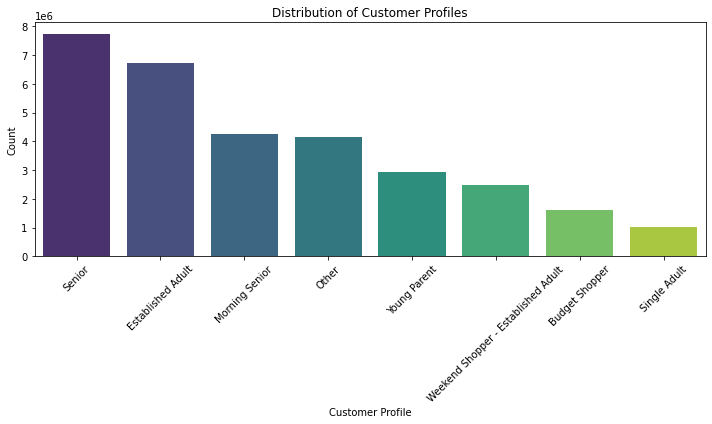

In [16]:
# Create a bar plot for the profile distribution
plt.figure(figsize=(10, 6))

sns.barplot(x=profile_counts.index, y=profile_counts.values, palette="viridis")

# Add titles and labels
plt.title('Distribution of Customer Profiles')
plt.xlabel('Customer Profile')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'distribution_of_customer_profiles.png'), bbox_inches = 'tight')


## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [ ]:
# Group by 'profile' and aggregate the max, mean, and min for 'order_number' and 'average_spend'
profile_aggregates = ords_prods_activecust.groupby('profile').agg({
    'order_number': ['max', 'mean', 'min'],
    'average_spend': ['max', 'mean', 'min']
}).reset_index()

In [ ]:
# Flatten the MultiIndex columns
profile_aggregates.columns = ['_'.join(col).strip() if col[1] else col[0] for col in profile_aggregates.columns.values]


In [ ]:
# Rename columns for better readability
profile_aggregates.columns = ['Profile', 'Max Orders', 'Mean Orders', 'Min Orders', 'Max Spend', 'Mean Spend', 'Min Spend']


In [ ]:
# Display the aggregated DataFrame
print(profile_aggregates)

## 8. Comparing customer profile with region and department.

In [17]:
# Get names of each department back into the data
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'))

In [18]:
df_dep

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [19]:
# Transpose:
df_dep_t = df_dep.T

In [20]:
# Create index
df_dep_t.reset_index(inplace = True)

In [21]:
# Copy row 0 into variable
new_header = df_dep_t.iloc[0]

In [22]:
# Remove row 0
df_dep_t = df_dep_t[1:]

In [23]:
# Assign header row
df_dep_t.columns = new_header

In [24]:
# Check code
df_dep_t

,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta
10,10,bulk


In [25]:
# Ensure department_id is int8 to merge
df_dep_t['department_id'] = df_dep_t['department_id'].astype('int8')

In [26]:
ords_prods_activecust['department_id'].dtype

dtype('int8')

In [ ]:
#Merge data
chunk_size = 100000
result = []

for start in range(0, len(ords_prods_activecust), chunk_size):
    end = start + chunk_size
    chunk = ords_prods_activecust[start:end]
    merged_chunk = chunk.merge(df_dep_t, on='department_id', indicator='merge1')
    result.append(merged_chunk)


full_data = pd.concat(result, ignore_index=True)

### Profile vs Region

In [ ]:
profile_region_crosstab = pd.crosstab(full_data['profile'], full_data['Region'])
print(profile_region_crosstab)



### Profile vs Department

In [ ]:
profile_department_crosstab = pd.crosstab(full_data['profile'], full_data['department'])
print(profile_department_crosstab)


## 9. Charts to illustrate the results.

### Profile vs Region

In [ ]:
# Plotting Profile vs Region
plt.figure(figsize=(14, 8))
sns.heatmap(profile_region_crosstab, annot=True, fmt='d', cmap='viridis')
plt.title('Customer Profiles vs Regions')
plt.xlabel('Region')
plt.ylabel('Customer Profile')

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profiles_vs_region.png'), bbox_inches = 'tight')
plt.show()

Certain customer profiles are more prevalent in specific regions. For example, "Senior" profiles are most common in the South, while "Single Adult" profiles are more frequent in the West.The data suggests that marketing strategies could be tailored based on regional preferences. For instance, promotions for seniors could be intensified in the South, while campaigns targeting single adults might be more effective in the West.

### Profile vs Department

In [ ]:
# Plotting Profile vs Department
plt.figure(figsize=(18, 10))
sns.heatmap(profile_department_crosstab, annot=True, fmt='d', cmap='viridis')
plt.title('Customer Profiles vs Departments')
plt.xlabel('Department ID')
plt.ylabel('Customer Profile')

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profile_vs_department.png'), bbox_inches = 'tight')
plt.show()

Certain departments have higher concentrations of specific customer profiles. For example, departments 'bakery', 'beverages', 'bulk', 'dairy eggs', 'frozen', and 'personal care' are popular among all customer profiles, particularly seniors and established adults.

## 10.  Export your final data set

In [ ]:
full_data.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_full_data.pkl'))